In [1]:
from coffea import util, processor
import matplotlib.pyplot as plt
import mplhep
import numpy as np
import pandas as pd
import coffea.processor as processor
plt.style.use(mplhep.style.CMS)

In [2]:
infile_QCD = util.load("Data_selected_raw_2017QCD.coffea")
infile_Sig = util.load("Data_selected_raw_2017Res1ToRes2GluTo3Glu.coffea")
display(infile_QCD)

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_800to1000': 1905945,
                          'QCD_Pt_600to800': 12799311,
                          'QCD_Pt_3200toInf': 757837,
                          'QCD_Pt_1400to1800': 776000,
                          'QCD_Pt_2400to3200': 1485987,
                          'QCD_Pt_1000to1400': 1517307,
                          'QCD_Pt_470to600': 27791204,
                          'QCD_Pt_1800to2400': 856734,
                          'QCD_Pt_300to470': 109308273}),
 'selected_events': defaultdict_accumulator(int,
                         {'QCD_Pt_800to1000': 1546526,
                          'QCD_Pt_600to800': 10155742,
                          'QCD_Pt_3200toInf': 585170,
                          'QCD_Pt_1400to1800': 630644,
                          'QCD_Pt_2400to3200': 1168373,
                          'QCD_Pt_1000to1400': 1236732,
                          'QCD_Pt_470to600': 16564908,
                    

In [3]:
var2use = [var for var in infile_QCD.keys()]
var2use.pop(0)
var2use.pop(0)
print(var2use)

# Import dict_accumulator into padas
QCD_samples = [x for x in infile_QCD["total_events"].keys()]
QCD_dict = {}
QCD_df_dict_train = {}
QCD_df_dict_test = {}
Sig_samples = [x for x in infile_Sig["total_events"].keys()]
Sig_dict = {}
Sig_df_dict_train = {}
Sig_df_dict_test = {}

from sklearn.model_selection import train_test_split
for sample in QCD_samples:
    print("Reading data for: ", sample)
    QCD_dict[sample] = {}
    for var in var2use:
        QCD_dict[sample][var] = infile_QCD[var][sample].value
    df_temp = pd.DataFrame(data=QCD_dict[sample])
    df_temp_set1, df_temp_set2 = train_test_split(df_temp, train_size=0.02, random_state=1)
    # We seperate dataset here manually so it is earlier to calculate the sentivity in the end (which needs us to reweight the QCD files)
    QCD_df_dict_train[sample] = df_temp_set1
    QCD_df_dict_test[sample] = df_temp_set2
        
for sample in Sig_samples:
    print("Reading data for: ", sample)
    Sig_dict[sample] = {}
    for var in var2use:
        Sig_dict[sample][var] = infile_Sig[var][sample].value
    df_temp = pd.DataFrame(data=Sig_dict[sample])
    df_temp_set1, df_temp_set2 = train_test_split(df_temp, train_size=0.25, random_state=1)
    Sig_df_dict_train[sample] = df_temp_set1
    Sig_df_dict_test[sample] = df_temp_set2

['eta_0_final', 'ptoverM_0_final', 'eta_1_final', 'ptoverM_1_final', 'eta_2_final', 'ptoverM_2_final', 'dEta_01_final', 'dR_01_final', 'moverM_01_final', 'dEta_12_final', 'dR_12_final', 'moverM_12_final', 'dEta_20_final', 'dR_20_final', 'moverM_20_final', 'dR_0_12_final', 'dEta_0_12_final', 'Phi_0_12_final', 'dPtoverM_0_12_final', 'dR_1_20_final', 'dEta_1_20_final', 'Phi_1_20_final', 'dPtoverM_1_20_final', 'dR_2_01_final', 'dEta_2_01_final', 'Phi_2_01_final', 'dPtoverM_2_01_final', 'eta_max_final', 'dR_max_final', 'dR_min_final', 'dEta_max_final', 'dEta_min_final', 'dR_j_jj_max_final', 'dR_j_jj_min_final', 'dEta_j_jj_max_final', 'dEta_j_jj_min_final', 'dPhi_j_jj_max_final', 'dPhi_j_jj_min_final', 'dPtoverM_j_jj_max_final', 'dPtoverM_j_jj_min_final']
Reading data for:  QCD_Pt_800to1000
Reading data for:  QCD_Pt_600to800
Reading data for:  QCD_Pt_3200toInf
Reading data for:  QCD_Pt_1400to1800
Reading data for:  QCD_Pt_2400to3200
Reading data for:  QCD_Pt_1000to1400
Reading data for:  QCD

In [4]:
QCD_df_list = [x for x in QCD_df_dict_train.keys()]
Sig_df_list = [x for x in Sig_df_dict_train.keys()]
QCD_df_train = pd.concat([QCD_df_dict_train[x] for x in QCD_df_list])
Sig_df_train = pd.concat([Sig_df_dict_train[x] for x in Sig_df_list])
QCD_df_test = pd.concat([QCD_df_dict_test[x] for x in QCD_df_list])
Sig_df_test = pd.concat([Sig_df_dict_test[x] for x in Sig_df_list])
print(QCD_df_train.head(), Sig_df_train.head(), QCD_df_test.head(), Sig_df_test.head())

         eta_0_final  ptoverM_0_final  eta_1_final  ptoverM_1_final  \
1304038    -0.198547         0.389953     0.593750         0.350835   
564871     -0.538452         0.414220     0.481873         0.372989   
668974      0.298035         0.482845     0.755249         0.470916   
990963      1.207031         0.423600     0.062073         0.409445   
1482991    -0.037292         0.437902    -1.603027         0.193695   

         eta_2_final  ptoverM_2_final  dEta_01_final  dR_01_final  \
1304038     1.519287         0.106473       0.792297     3.171938   
564871      1.735840         0.036101       1.020325     3.221033   
668974      0.156036         0.018063       0.457214     3.138222   
990963     -0.250366         0.017226       1.144958     3.339135   
1482991    -0.889648         0.191806       1.565735     2.626287   

         moverM_01_final  dEta_12_final  ...  dEta_max_final  dEta_min_final  \
1304038         0.800687       0.925537  ...        1.717834        0.792297  

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare lables for dataframes, please note we already spplited the data once!
QCD_labels = np.zeros(QCD_df_train.shape[0])
Sig_labels = np.ones(Sig_df_train.shape[0])

# Splite data, _set2 will be used for the independent testing
QCD_set1, QCD_set2, QCD_label_set1, QCD_label_set2 = train_test_split(QCD_df_train, QCD_labels, 
                                                                          train_size=0.5, stratify=QCD_labels, random_state=1)
Sig_set1, Sig_set2, Sig_label_set1, Sig_label_set2 = train_test_split(Sig_df_train, Sig_labels, 
                                                                          train_size=0.5, stratify=Sig_labels, random_state=1)
# Combine QCD_set1 and Sig_set1, splite data again for actual training and testing
X_train = pd.concat([QCD_set1, Sig_set1])
y_train = np.append(QCD_label_set1, Sig_label_set1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

dEta_max_final             0.265377
dR_max_final               0.250435
ptoverM_0_final            0.239441
dR_j_jj_max_final          0.237099
dR_0_12_final              0.231931
dR_1_20_final              0.227044
dEta_01_final              0.223958
dEta_j_jj_max_final        0.223934
dEta_0_12_final            0.215387
dEta_1_20_final            0.213080
dR_01_final                0.210353
dEta_j_jj_min_final        0.207843
eta_max_final              0.197131
dEta_20_final              0.179613
dEta_min_final             0.175280
dR_2_01_final              0.175125
dR_j_jj_min_final          0.170044
dEta_2_01_final            0.167298
ptoverM_1_final            0.161206
dEta_12_final              0.150805
dPtoverM_j_jj_max_final    0.133051
ptoverM_2_final            0.128393
dR_min_final               0.122590
dPtoverM_0_12_final        0.120576
dPtoverM_1_20_final        0.119301
dPtoverM_2_01_final        0.118048
dR_20_final                0.115794
dPtoverM_j_jj_min_final    0

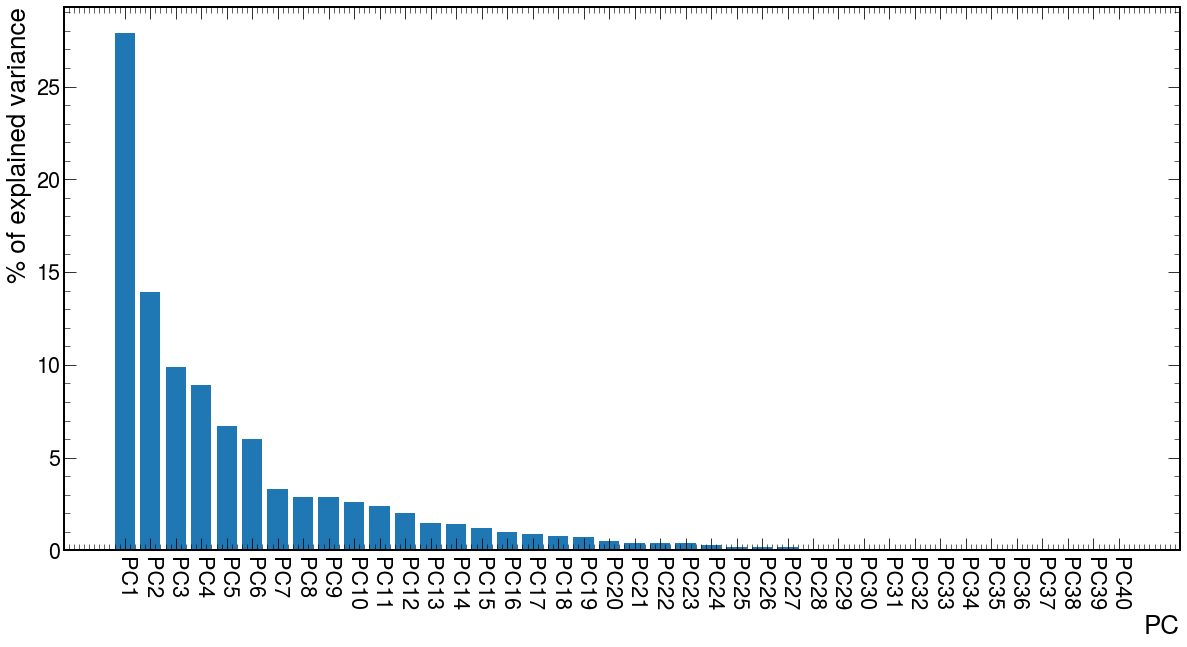

array([[ 1.00000157e+00, -5.23445978e-04, -4.89285490e-02, ...,
        -9.96186354e-04,  3.44696701e-04, -2.92846205e-04],
       [-5.23445978e-04,  1.00000157e+00, -1.00495829e-03, ...,
        -3.46899856e-02,  3.76522506e-01,  4.70654312e-01],
       [-4.89285490e-02, -1.00495829e-03,  1.00000157e+00, ...,
         8.53227456e-04,  6.28263391e-04,  7.75850398e-04],
       ...,
       [-9.96186354e-04, -3.46899856e-02,  8.53227456e-04, ...,
         1.00000157e+00, -3.48408164e-01, -1.46161341e-01],
       [ 3.44696701e-04,  3.76522506e-01,  6.28263391e-04, ...,
        -3.48408164e-01,  1.00000157e+00,  8.15758764e-01],
       [-2.92846205e-04,  4.70654312e-01,  7.75850398e-04, ...,
        -1.46161341e-01,  8.15758764e-01,  1.00000157e+00]])

In [37]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaled_df = preprocessing.scale(X_train)
pca = PCA()
pca.fit(scaled_df)
# Calculate percentage variation
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
# Calculate loading scores
loading_scores = pd.Series(pca.components_[0], index=var2use)
loading_scores = loading_scores.abs().sort_values(ascending=False)
display(loading_scores)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(20,10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("% of explained variance")
plt.xlabel("PC")
plt.xticks(rotation=270)
plt.show()
pca.get_covariance()

In [31]:
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(100),random_state=1)
clf.fit(X_train, y_train)
print("Number of QCD events used for training (first split): ", QCD_df_train.shape[0])
print("Number of Sig events used for training (first split): ", Sig_df_train.shape[0])
print("Number of QCD events used for training (second split): ", QCD_set1.shape[0])
print("Number of Sig events used for training (second split): ", Sig_set1.shape[0])

MLPClassifier(hidden_layer_sizes=100, random_state=1)

In [32]:
# Manually calculate classificiation efficiency
sig_index_list = np.where(y_test == 0)[0].tolist()
N_test = len(sig_index_list)
clf_results_sig = np.array([])
N_correct = 0
N_tested = 0
for i, index in enumerate(sig_index_list):
    if i % 20000 == 0:
        print(f"Reading: {i} out of {N_test}")
    is_correct = (y_test[index] == clf.predict(X_test[index:index+1, :])[0]) 
    if is_correct:
        clf_results_sig = np.append(clf_results_sig, 1)
    else:
        clf_results_sig = np.append(clf_results_sig, 0)
    # save results and restart again to speed things up
    if i % 20000 == 0:
        N_correct += np.sum(clf_results_sig)
        N_tested += np.size(clf_results_sig)
        print(N_correct, N_tested)
        clf_results_sig = np.array([])
# Save the results from last batch
N_correct += np.sum(clf_results_sig)
N_tested += np.size(clf_results_sig)
# Calculate classification efficiency
print(N_correct, N_tested, N_correct / N_tested)

Reading: 0 out of 95353
1.0 1
Reading: 20000 out of 95353
15544.0 20001


KeyboardInterrupt: 

In [33]:
# Score the fit
QCD_set2_scaled = scaler.transform(QCD_set2)
print(clf.score(QCD_set2_scaled,QCD_label_set2))
Sig_set2_scaled = scaler.transform(Sig_set2)
print(clf.score(Sig_set2_scaled,Sig_label_set2))

0.7777818562225852
0.6315658980625509


In [34]:
# Score the fit using the pure QCD or Signal data
QCD_labels = np.zeros(QCD_df_test.shape[0])
Sig_labels = np.ones(Sig_df_test.shape[0])
QCD_test_scaled = scaler.transform(QCD_df_test)
print(clf.score(QCD_test_scaled,QCD_labels))
Sig_test_scaled = scaler.transform(Sig_df_test)
print(clf.score(Sig_test_scaled,Sig_labels))

0.7783802067257557
0.6302555841811704


In [25]:
# Implement weight of MCs
lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_QCD["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_QCD["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_QCD["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_QCD["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_QCD["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_QCD["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_QCD["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_QCD["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_QCD["total_events"]["QCD_Pt_3200toInf"],
}
weight_sig = {}
for name, N_evt in infile_Sig["total_events"].items():
    weight_sig[name] = lumi/N_evt
weight_xsec.update(weight_sig)
# display(weight_xsec)

# Get the total number of events being selected by HLT and pre-selection
N_QCD = 0
for sample, N_selected in infile_QCD["selected_events"].items():
    N_QCD += N_selected
N_Sig = 0
for sample, N_selected in infile_Sig["selected_events"].items():
    N_Sig += N_selected
    
# Calculate corrections need to be applied into S/sqrt(B), since we only use half of the data for calculation
ratio_bkg = QCD_df_test.shape[0] / N_QCD
ratio_sig = Sig_df_test.shape[0] / N_Sig
print(ratio_bkg, ratio_sig)

Number of QCD events used for training (first split):  762818
Number of Sig events used for training (first split):  508194
Number of QCD events used for training (second split):  762818
Number of Sig events used for training (second split):  508194
0.9800001211290772 0.7500100843246307


In [26]:
import math
N_bkg_tagged = 0
for sample in QCD_df_dict_test.keys():
    weight = weight_xsec[sample]
    bkg_scaled = scaler.transform(QCD_df_dict_test[sample])
    bkg_result = clf.predict(bkg_scaled)
    N_bkg_tagged += np.sum(bkg_result) * (weight / ratio_bkg)
print(N_bkg_tagged)

N_sig_tagged = 0
for sample in ["Res1ToRes2GluTo3Glu_M1-5000_R-0p3"]:
    weight = weight_xsec[sample]
    sig_scaled = scaler.transform(Sig_df_dict_test[sample])
    sig_result = clf.predict(sig_scaled)
    N_sig_tagged += np.sum(sig_result) * (weight / ratio_sig)
print(N_sig_tagged)
print(N_sig_tagged/math.sqrt(N_bkg_tagged))

8700872.252843894
24763.000042471653
8.395022456969771


In [ ]:
import joblib

filename = './MLP_QCD_ggg_15_15.pkl'
joblib.dump(clf, filename, compress=9)

clf2 = joblib.load(filename)
clf2.score(Sig_set2_scaled, Sig_label_set2)